<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitskiy](https://yorko.github.io). 
Translated and edited by [Maxim Keremet](https://www.linkedin.com/in/maximkeremet/), [Artem Trunov](https://www.linkedin.com/in/datamove/), and [Aditya Soni](https://www.linkedin.com/in/aditya-soni-0505a9124/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center>Assignment #2. Fall 2018 <br> Exploratory Data Analysis (EDA) of US flights <br> (using Pandas, Matplotlib & Seaborn)
Prior to working on the assignment, you'd better check out the corresponding course material:
 - [Visualization: from Simple Distributions to Dimensionality Reduction](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_visual_data_analysis.ipynb?flush_cache=true)
 - [Overview of Seaborn, Matplotlib and Plotly libraries](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_additional_seaborn_matplotlib_plotly.ipynb?flush_cache=true)
 - first lectures in [this](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX) YouTube playlist 

### Your task is to:
 - write code and perform computations in the cells below
 - choose answers in the [webform](https://docs.google.com/forms/d/1qSTjLAGqsmpFRhacv0vM-CMQSTT_mtOalNXdRTcdtM0/edit)
 - submit answers with **the very same email and name** as in assignment 1. This is a part of the assignment, if you don't manage to do so, you won't get credits. If in doubt, you can re-submit A1 form till the deadline for A1, no problem
 
### <center> Deadline for A2: 2018 October 21, 20:59 CET



In [1]:
import numpy as np
import pandas as pd
# pip install seaborn 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 'Cancelled': np.uint8, 
         'Year': np.uint16, 'FlightNum': np.uint16 , 'Distance': np.uint16, 
         'UniqueCarrier': str, 'CancellationCode': str, 'Origin': str, 'Dest': str,
         'ArrDelay': np.float16, 'DepDelay': np.float16, 'CarrierDelay': np.float16,
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 'SecurityDelay': np.float16,
         'LateAircraftDelay': np.float16, 'DepTime': np.float16}

In [18]:
%%time
# change the path if needed
path = '2008.csv.bz2'
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

CPU times: user 34.7 s, sys: 345 ms, total: 35 s
Wall time: 35.1 s


In [110]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0


# Solutions:

**1. Find top-10 carriers in terms of the number of completed flights (_UniqueCarrier_ column)?**

**Which of the listed below is _not_ in your top-10 list?**
- DL
- AA
- OO
- EV +

In [72]:
flights_df['UniqueCarrier'].value_counts().iloc[:10] # ---> EV missing

UniqueCarrier
WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
Name: UniqueCarrier, dtype: int64

**2. Plot distributions of flight cancellation reasons (_CancellationCode_).**

**What is the most frequent reason for flight cancellation? (Use this [link](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) to translate codes into reasons)**
- carrier
- weather conditions +
- National Air System
- security reasons

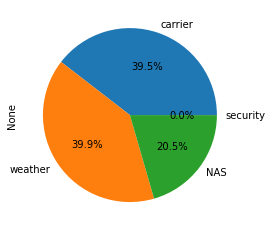

In [96]:
flights_df.groupby('CancellationCode').size().plot(
    kind='pie',
    autopct='%0.1f%%',
    labels=['carrier', 'weather', 'NAS', 'security'])

**3. Which route is the most frequent, in terms of the number of flights?**

(Take a look at _'Origin'_ and _'Dest'_ features. Consider _A->B_ and _B->A_ directions as _different_ routes) 

 - New-York – Washington
 - San-Francisco – Los-Angeles +
 - San-Jose – Dallas
 - New-York – San-Francisco

In [134]:
pd.crosstab(flights_df.Origin, flights_df.Dest).max(axis=1).idxmax(),\
pd.crosstab(flights_df.Origin, flights_df.Dest).max(axis=0).idxmax()

('SFO', 'LAX')

**4. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.**

- 449 
- 539 
- 549 
- 668 +

In [41]:
flights_del_dep = flights_df[flights_df['DepDelay'] > 0]
del_flights = flights_del_dep.groupby(['Origin', 'Dest'])\
    .agg(Routes=('Origin', 'size'),
         Weather=('WeatherDelay', lambda x: (x > 0).sum()))\
    .sort_values('Routes', ascending=False)[:5]
print('flights delayed because of weather:', del_flights['Weather'].sum())
del_flights

flights delayed because of weather: 668.0


,,Routes,Weather
Origin,Dest,,
LAX,SFO,6253,109.0
DAL,HOU,5742,133.0
SFO,LAX,5322,31.0
ORD,LGA,5311,266.0
HOU,DAL,5288,129.0


**5. Examine the hourly distribution of departure times. For that, create a new series from DepTime, removing missing values.**

**Choose all correct statements:**
 - Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).
 - Flights are uniformly distributed within time interval [0-23].
 - In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm. +

In [12]:
deptime = flights_df['DepTime'].copy().dropna()

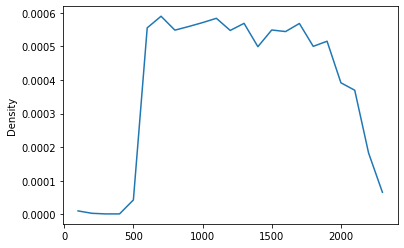

In [30]:
deptime.plot.kde(ind=[100, 200, 300, 400, 500, 600, 700, 800, 900 , 1000, 1100, 1200,
                      1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300]);

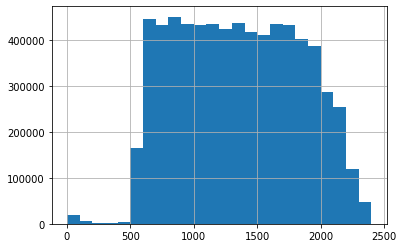

In [31]:
deptime.hist(bins=24)

**6. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**

**Choose all correct statements:**
- The number of flights during weekends is less than during weekdays (working days). +
- The lowest number of flights is on Sunday.
- There are less flights during winter than during summer. +

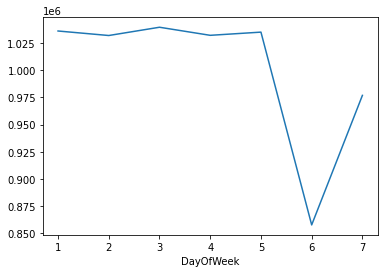

In [27]:
flights_df.groupby('DayOfWeek').size().plot();

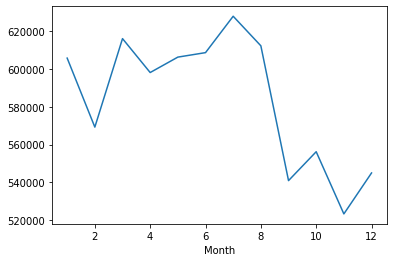

In [61]:
flights_df.groupby('Month').size().plot();

**7. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.**

**Choose all correct statements:**
- December has the highest rate of cancellations due to weather. +
- The highest rate of cancellations in September is due to Security reasons.
- April's top cancellation reason is carriers. +
- Flights cancellations due to National Air System are more frequent than those due to carriers.

True

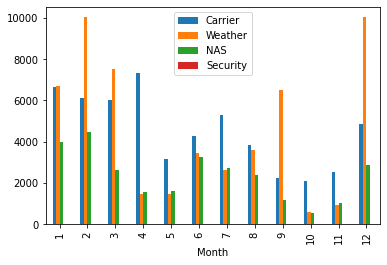

In [67]:
flights_df.groupby(['Month'])\
    .agg(Carrier=('CancellationCode', lambda x: (x == 'A').sum()),
         Weather=('CancellationCode', lambda x: (x == 'B').sum()),
         NAS=('CancellationCode', lambda x: (x == 'C').sum()),
         Security=('CancellationCode', lambda x: (x == 'D').sum())
        ).plot(kind='bar');
# just a check
flights_df[(flights_df['Month'] == 12) & (flights_df['CancellationCode'] == 'B')]['CancellationCode'].count() > \
flights_df[(flights_df['Month'] == 2) & (flights_df['CancellationCode'] == 'B')]['CancellationCode'].count()

**8. Which month has the greatest number of cancellations due to Carrier?** 
- May
- January
- September
- April +

In [74]:
flights_df.groupby('Month')\
    .agg(CarrierCanc=('CancellationCode', lambda x: (x == 'A').sum()))\
    .sort_values('CarrierCanc', ascending=False)[:1]

,CarrierCanc
Month,
4,7312


**9. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.**

- 9E
- EV
- HA
- AA +

In [79]:
flights_df.groupby(['Month', 'UniqueCarrier'])\
    .agg(CarrierCanc=('CancellationCode', lambda x: (x == 'A').sum()))\
    .sort_values('CarrierCanc', ascending=False)[:1]

,,CarrierCanc
Month,UniqueCarrier,
4,AA,3696


**10. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay').
[Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile.**

- EV
- OO
- AA
- AQ +

In [19]:
delays = flights_df[(flights_df.ArrDelay >= 0) &
                    (flights_df.ArrDelay >= flights_df.ArrDelay.quantile(0.95)) &
                    (flights_df.DepDelay >= 0) &
                    (flights_df.DepDelay >= flights_df.DepDelay.quantile(0.95))]
delays = delays.groupby('UniqueCarrier')\
    .agg(ArrDelayMean = ('DepDelay', 'mean'),
         DepDelayMean = ('ArrDelay', 'mean'))\
    .sort_values(['DepDelayMean', 'ArrDelayMean'], ascending=True)[:5]
delays

,ArrDelayMean,DepDelayMean
UniqueCarrier,,
AQ,133.625,130.500
WN,131.625,131.125
OO,129.250,134.625
F9,131.625,135.125
US,138.000,138.750
